In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
%matplotlib inline

In [2]:
loansdf = pd.read_csv('loan_data.csv')

In [3]:
# Q-1: Load the dataset and print the metadata in the notebook. - 1M
loansdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loansdf.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loansdf.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<AxesSubplot:xlabel='purpose', ylabel='count'>

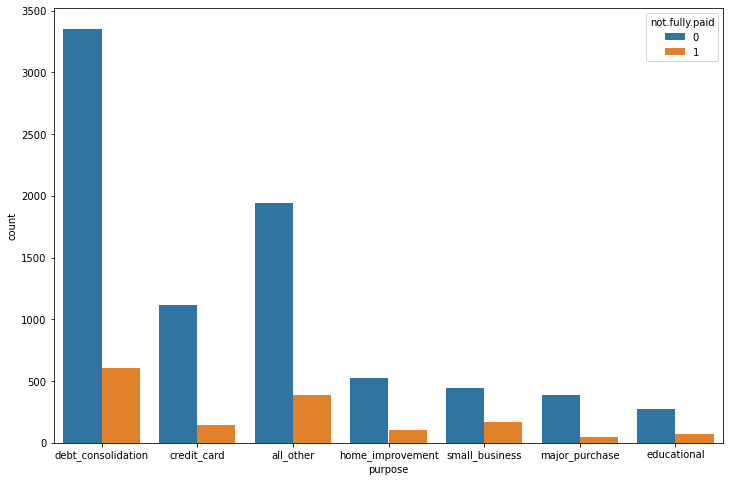

In [6]:
# Q-2: Create a countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid. Mention the insights from the same. - 1M
plt.figure(figsize=(12,8))
sns.countplot(x='purpose',hue='not.fully.paid', data=loansdf)

# Insight: From Above graph we can say that the main reasons for getting the loan are debt_consolidation,credit_card and all_other, Also the proportion of fullypaid vs not fully paid seems to be equal among all the purpose.

<AxesSubplot:>

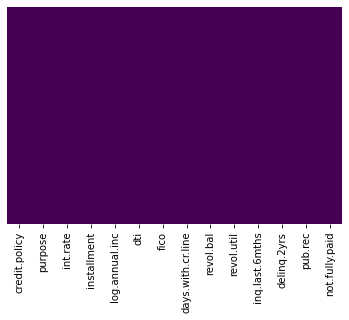

In [7]:
# Q3 Print a heatmap to check NULL values and Correlation values. - 1M
sns.heatmap(loansdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

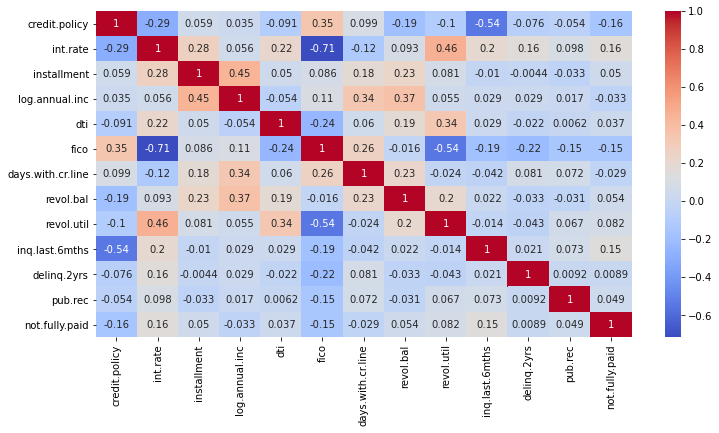

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(loansdf.corr(),cmap='coolwarm',annot=True)

In [9]:
# Q4 Perform stratified splitting of train and test data to ensure similar class distribution. 1M
loansdfwithdummies = pd.get_dummies(loansdf,columns=['purpose'],drop_first=True)

In [10]:
loansdfwithdummies.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=loansdfwithdummies.drop('not.fully.paid',axis=1)
y=loansdfwithdummies['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42,stratify=y)

In [13]:
# Q-5: Build a classifier model using the Decision Tree algorithm and plot the same. - (1+1)M
from sklearn.tree import DecisionTreeClassifier

In [14]:
decisiontree = DecisionTreeClassifier()

In [15]:
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
pred = decisiontree.predict(X_test)

In [17]:
classes = ['Not fully paid','fully paid']
def plot_confusionmatrix(pred,y_test,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_test,pred)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Test score 0.7441097524604832
Test Confusion matrix


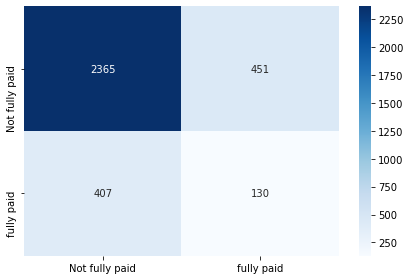

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2816
           1       0.22      0.24      0.23       537

    accuracy                           0.74      3353
   macro avg       0.54      0.54      0.54      3353
weighted avg       0.75      0.74      0.75      3353



In [18]:
# Q-6: Print confusion matrix and classification report before and after pruning the Decision tree. 
#Write down your observations on the effects of pruning. - (1+1)M
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(f'Test score {accuracy_score(pred,y_test)}')
plot_confusionmatrix(pred,y_test,dom='Test')
print(classification_report(y_test,pred))

## Observation : Before Pruning we have around 74% of accuracy in classification report and 350,429 records fall under the category of false positive and false negative.

In [19]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.7405308678795108
Criterion=entropy 0.741425589024754


## The Entropy method has a slight improvement over the Gini . Now, let’s check if pruning the tree using max_depth can give us any better results.

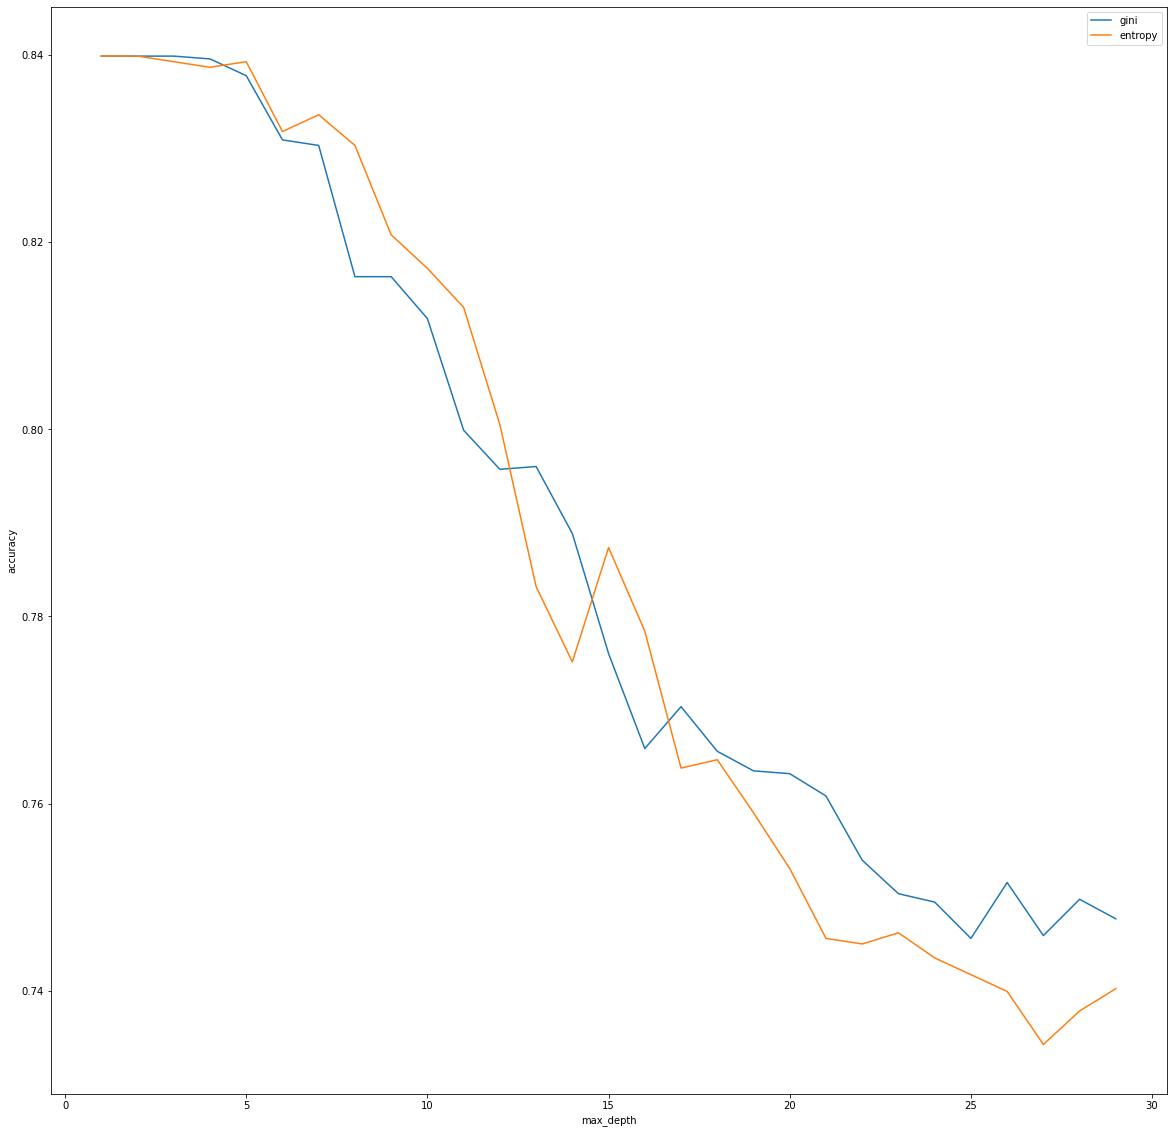

In [20]:
plt.figure(figsize=(20,20))
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 'acc_entropy':pd.Series(acc_entropy),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

## Observation : It seems like in this scenario entropy works best (near 0.84 accuracy). So let’s draw the tree with max_depth=7 and criterion=entropy to see how it looks like.

Test score 0.8335818669847898
Test Confusion matrix


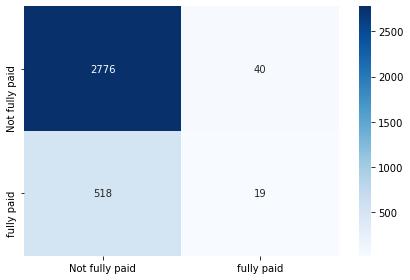

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2816
           1       0.32      0.04      0.06       537

    accuracy                           0.83      3353
   macro avg       0.58      0.51      0.49      3353
weighted avg       0.76      0.83      0.77      3353



In [25]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print(f'Test score {accuracy_score(pred,y_test)}')
plot_confusionmatrix(pred,y_test,dom='Test')
print(classification_report(y_test,pred))

## Observation after Pruning: After pruning i.e. selecting entropy method and keeping the depth level=7 our model accuracy has increased from 73% ( i.e. Before Pruning) to 83%

In [27]:
# Q-7: Find out the stratified cross-validation accuracy 1M.
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv=10)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.16)
